In [139]:
# Importing Packages 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import math
from sklearn import metrics

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


%matplotlib inline
plt.rcParams['font.size'] = 14

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [140]:
trainDf = pd.read_csv("price_train.csv")
testDf = pd.read_csv("price_test.csv")

In [141]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

In [142]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            1734 non-null   int64  
 1   id                            1734 non-null   int64  
 2   host_is_superhost             1734 non-null   bool   
 3   host_response_rate            1734 non-null   object 
 4   host_response_time            1734 non-null   object 
 5   host_listings_count           1734 non-null   int64  
 6   host_identity_verified        1734 non-null   bool   
 7   accommodates                  1734 non-null   int64  
 8   neighbourhood_group_cleansed  1734 non-null   object 
 9   property_type                 1734 non-null   object 
 10  room_type                     1734 non-null   object 
 11  latitude                      1734 non-null   float64
 12  longitude                     1734 non-null   float64
 13  gue

In [143]:
trainDf.isnull().sum()

X1                              0
id                              0
host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
price                           0
dtype: int64

In [144]:
testDf.isnull().sum()

X1                              0
id                              0
host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
dtype: int64

In [145]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

In [146]:
trainDf.head(20)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00
5,2757,13533608,False,100%,within a few hours,4,True,8,Magnolia,Townhouse,Entire home/apt,47.649938,-122.383192,6,3.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Indoor fireplace"",Heating,""F...",$100.00,2,1125,False,strict_14_with_grace_period,$430.00
6,7786,29396738,True,100%,within an hour,1,False,3,Other neighborhoods,Bungalow,Private room,47.678508,-122.365246,2,1.0,1,2,Real Bed,"{TV,Wifi,""Free street parking"",Heating,Washer,...",$20.00,1,8,False,moderate,$60.00
7,7012,26667492,False,100%,within an hour,9,False,4,Downtown,Condominium,Entire home/apt,47.612819,-122.328973,2,1.0,1,2,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$50.00,3,1125,True,strict_14_with_grace_period,$125.00
8,6019,23417458,True,100%,within an hour,2,False,2,Downtown,Apartment,Entire home/apt,47.606281,-122.339739,2,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Pets...",$110.00,1,1125,True,strict_14_with_grace_period,$225.00
9,3766,17465443,False,99%,within an hour,152,False,2,Downtown,Loft,Entire home/apt,47.612551,-122.320454,1,1.5,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,Gym,Elevator,""Buzzer...",$89.00,2,1125,False,strict_14_with_grace_period,$219.00


In [147]:
trainDf.host_response_time.value_counts()

within an hour        2887
within a few hours     388
within a day           163
a few days or more      28
Name: host_response_time, dtype: int64

# Exploratory Data Analysis (EDA)

In [148]:
trainDf.corr()

,X1,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,instant_bookable
X1,1.000000,0.992830,-0.114010,0.075050,-0.397006,0.042897,-0.045818,-0.009408,0.017910,-0.018511,-0.007554,0.025276,-0.011721,0.026911,0.226472
id,0.992830,1.000000,-0.112902,0.082052,-0.396472,0.042783,-0.049005,-0.008151,0.022117,-0.017799,-0.007614,0.024977,-0.013940,0.032444,0.230817
host_is_superhost,-0.114010,-0.112902,1.000000,-0.251724,0.178139,0.029976,0.031472,-0.028175,0.005917,-0.051945,0.021130,0.025615,-0.048737,-0.140728,-0.108978
host_listings_count,0.075050,0.082052,-0.251724,1.000000,-0.197717,0.012140,-0.075716,-0.030291,0.044703,0.011453,-0.032705,-0.037450,0.006226,0.173826,0.165884
host_identity_verified,-0.397006,-0.396472,0.178139,-0.197717,1.000000,-0.008747,0.049858,0.009511,-0.000534,0.048293,0.028514,0.017903,0.036959,-0.059467,-0.293922
accommodates,0.042897,0.042783,0.029976,0.012140,-0.008747,1.000000,-0.024712,-0.054723,0.665960,0.548977,0.812256,0.865667,-0.038819,0.036861,0.033269
latitude,-0.045818,-0.049005,0.031472,-0.075716,0.049858,-0.024712,1.000000,-0.163524,-0.020540,0.007133,-0.011263,-0.005180,0.036532,-0.025317,-0.042532
longitude,-0.009408,-0.008151,-0.028175,-0.030291,0.009511,-0.054723,-0.163524,1.000000,-0.055097,-0.022418,-0.038281,-0.039856,-0.007538,0.008247,0.008736
guests_included,0.017910,0.022117,0.005917,0.044703,-0.000534,0.665960,-0.020540,-0.055097,1.000000,0.408783,0.587819,0.581370,-0.030652,0.018778,0.054904
bathrooms,-0.018511,-0.017799,-0.051945,0.011453,0.048293,0.548977,0.007133,-0.022418,0.408783,1.000000,0.613708,0.536232,-0.006655,0.013907,-0.058729


In [149]:
trainDf.describe()

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000
mean,4501.088575,1.843582e+07,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,3.328621,595.884305
std,2483.133761,8.885055e+06,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,10.540059,530.773958
min,1.000000,4.291000e+03,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,2328.500000,1.197427e+07,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,1.000000,30.000000
50%,4681.500000,2.024816e+07,2.000000,3.000000,47.620930,-122.332554,1.000000,1.000000,1.000000,1.00000,2.000000,365.000000
75%,6696.750000,2.546066e+07,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,2.000000,1125.000000
max,8456.000000,3.223951e+07,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,330.000000,1825.000000


In [150]:
# drop amenities due to high cardinality: 3069 distinct values; Drop the X1 variable because of highly corr with id and set the id as an index
trainDf.drop(['X1', 'amenities' ], axis=1, inplace=True) 
testDf.drop(['X1', 'amenities'], axis=1, inplace=True) 
trainDf.set_index('id', inplace=True)
testDf.set_index('id', inplace=True)

In [151]:
trainDf.head()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
id,,,,,,,,,,,,,,,,,,,,,,
22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,$129.00,2,1125,True,strict,$279.00
18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,$50.00,2,30,True,moderate,$99.00
22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,$25.00,2,28,False,moderate,$75.00
3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,$0.00,2,30,False,flexible,$70.00
23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,$99.00,2,12,False,flexible,$242.00


In [152]:
# apply replace method to solved the data anomaly on both dataset
trainDf['price'] = trainDf.price.str.replace('$', '')
trainDf['cleaning_fee'] = trainDf.cleaning_fee.str.replace('$', '')
trainDf['host_response_rate'] = trainDf.host_response_rate.str.replace('%', '')

testDf['cleaning_fee'] = testDf.cleaning_fee.str.replace('$', '')
testDf['host_response_rate'] = testDf.host_response_rate.str.replace('%', '')


In [153]:
trainDf.head()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
id,,,,,,,,,,,,,,,,,,,,,,
22146017,False,99,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,129.0,2,1125,True,strict,279.0
18638163,True,100,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,50.0,2,30,True,moderate,99.0
22734110,True,100,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,25.0,2,28,False,moderate,75.0
3946674,True,90,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,0.0,2,30,False,flexible,70.0
23610186,True,100,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,99.0,2,12,False,flexible,242.0


In [154]:
trainDf.dtypes

host_is_superhost                  bool
host_response_rate               object
host_response_time               object
host_listings_count               int64
host_identity_verified             bool
accommodates                      int64
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
latitude                        float64
longitude                       float64
guests_included                   int64
bathrooms                       float64
bedrooms                          int64
beds                              int64
bed_type                         object
cleaning_fee                     object
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                   bool
cancellation_policy              object
price                            object
dtype: object

# Exploratory data analysis

[None, None, None, None]

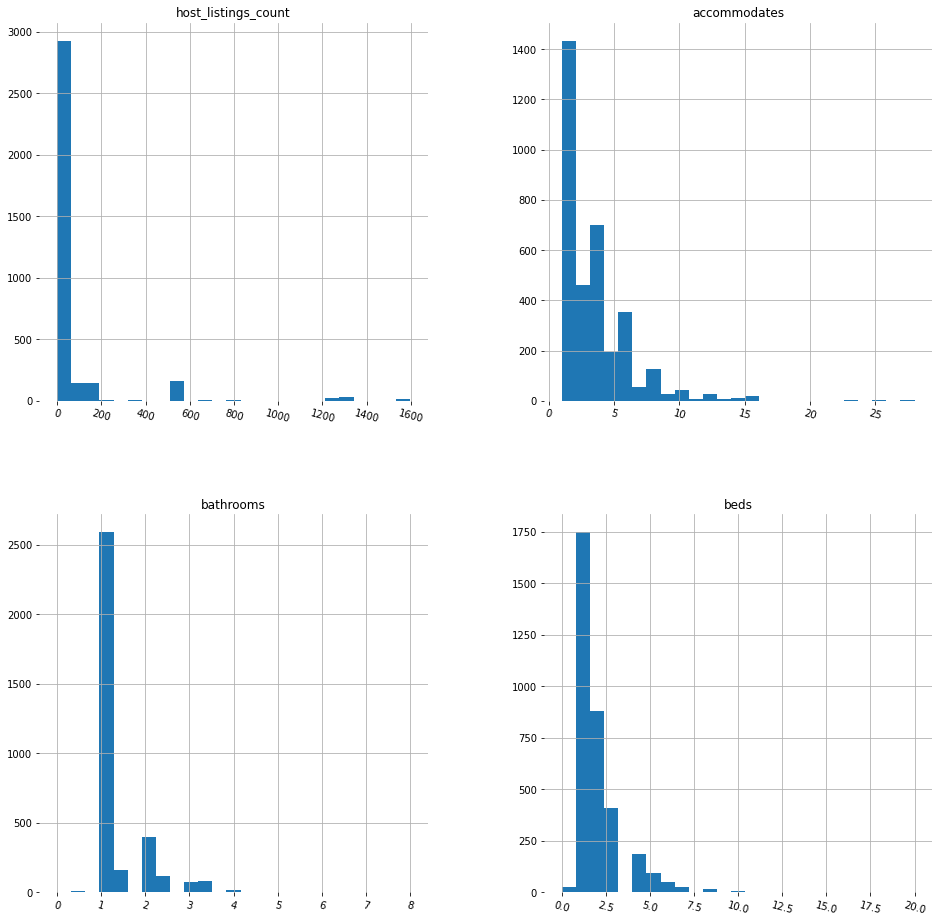

In [155]:
# A histogram of numerical data
test=trainDf[['host_listings_count', 'accommodates', 'bathrooms', 'beds', ]]
h = test.hist(bins=25,figsize=(16,16), xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()]
[x.yaxis.tick_left() for x in h.ravel()]

# Feature Engineering

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [157]:
trainDf[col_list]

,host_is_superhost,host_identity_verified,instant_bookable,host_response_time,neighbourhood_group_cleansed,cancellation_policy
id,,,,,,
22146017,False,False,True,within an hour,Downtown,strict
18638163,True,True,True,within an hour,Queen Anne,moderate
22734110,True,False,False,within an hour,Rainier Valley,moderate
3946674,True,True,False,within a few hours,Central Area,flexible
23610186,True,True,False,within an hour,Beacon Hill,flexible
...,...,...,...,...,...,...
22208755,False,False,True,within an hour,Downtown,strict
28049926,False,False,True,within an hour,Capitol Hill,strict_14_with_grace_period
23567364,True,False,True,within an hour,Other neighborhoods,flexible


In [158]:
testDf[col_list]

,host_is_superhost,host_identity_verified,instant_bookable,host_response_time,neighbourhood_group_cleansed,cancellation_policy
id,,,,,,
392779,False,True,True,within an hour,Beacon Hill,moderate
12456183,True,False,True,within a day,Lake City,moderate
1851863,True,True,False,within an hour,Northgate,strict_14_with_grace_period
23309878,True,True,False,within an hour,Downtown,strict_14_with_grace_period
10768347,False,False,False,within an hour,Other neighborhoods,flexible
...,...,...,...,...,...,...
19350610,False,True,False,within an hour,University District,moderate
7886656,True,True,True,within an hour,West Seattle,moderate
3535171,True,True,False,within an hour,Other neighborhoods,strict_14_with_grace_period


In [ ]:
@

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('property_type', OneHotEncoder(), [0])], remainder = 'passthrough')

In [164]:
le = OneHotEncoder()
dfle = trainDf
# le.fit(dfle.room_type)
dfle.town = le.fit_transform(dfle.room_type)
dfle

ValueError: Expected 2D array, got 1D array instead:
array=['Entire home/apt' 'Entire home/apt' 'Entire home/apt' ... 'Private room'
 'Entire home/apt' 'Entire home/apt'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [159]:
col_list = ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'host_response_time', 'neighbourhood_group_cleansed','cancellation_policy' ]

# for col in col_list:
#     print(col)
#     le.fit(trainDf[col])
#     trainDf[col] = le.transform(trainDf[col])
#     testDf[col] = le.transform(testDf[col])
    

In [136]:
trainDf[['property_type', 'room_type', 'bed_type',]]

,property_type,room_type,bed_type
id,,,
22146017,Apartment,Entire home/apt,3
18638163,House,Entire home/apt,3
22734110,Guest suite,Entire home/apt,3
3946674,House,Private room,3
23610186,House,Entire home/apt,3
...,...,...,...
22208755,Apartment,Entire home/apt,3
28049926,House,Shared room,3
23567364,House,Private room,3


In [137]:
testDf[['property_type', 'room_type', 'bed_type',]]

,property_type,room_type,bed_type
id,,,
392779,Guest suite,Entire home/apt,Real Bed
12456183,Guest suite,Entire home/apt,Real Bed
1851863,Apartment,Entire home/apt,Real Bed
23309878,Apartment,Entire home/apt,Real Bed
10768347,House,Private room,Real Bed
...,...,...,...
19350610,Apartment,Entire home/apt,Real Bed
7886656,Apartment,Entire home/apt,Real Bed
3535171,House,Private room,Real Bed


In [101]:
trainDf[col_list]

,host_is_superhost,host_identity_verified,instant_bookable,host_response_time,neighbourhood_group_cleansed,property_type,room_type,bed_type,cancellation_policy
id,,,,,,,,,
22146017,0,0,1,3,6,1,0,3,2
18638163,1,1,1,3,12,14,0,3,1
22734110,1,0,0,3,13,11,0,3,1
3946674,1,1,0,2,4,14,1,3,0
23610186,1,1,0,3,1,14,0,3,0
...,...,...,...,...,...,...,...,...,...
22208755,0,0,1,3,6,1,0,3,2
28049926,0,0,1,3,2,14,2,3,3
23567364,1,0,1,3,11,14,1,3,0


In [102]:
# train Dataset dtype transform 
trainDf.host_is_superhost = le.fit_transform(trainDf.host_is_superhost)
trainDf.host_identity_verified = le.fit_transform(trainDf.host_identity_verified)
trainDf.instant_bookable = le.fit_transform(trainDf.instant_bookable)
trainDf.host_response_time = le.fit_transform(trainDf.host_response_time)
trainDf.neighbourhood_group_cleansed = le.fit_transform(trainDf.neighbourhood_group_cleansed)
trainDf.property_type = le.fit_transform(trainDf.property_type)
trainDf.room_type = le.fit_transform(trainDf.room_type)
trainDf.bed_type = le.fit_transform(trainDf.bed_type)  
trainDf.cancellation_policy = le.fit_transform(trainDf.cancellation_policy)

In [21]:
# test Dataset dtype transform 
testDf.host_is_superhost = le.fit_transform(testDf.host_is_superhost)
testDf.host_identity_verified = le.fit_transform(testDf.host_identity_verified)
testDf.instant_bookable = le.fit_transform(testDf.instant_bookable)
testDf.host_response_time = le.fit_transform(testDf.host_response_time)
testDf.neighbourhood_group_cleansed = le.fit_transform(testDf.neighbourhood_group_cleansed)
testDf.property_type = le.fit_transform(testDf.property_type)
testDf.room_type = le.fit_transform(testDf.room_type)
testDf.bed_type = le.fit_transform(testDf.bed_type)
testDf.cancellation_policy = le.fit_transform(testDf.cancellation_policy)


In [22]:
trainDf.head()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
id,,,,,,,,,,,,,,,,,,,,,,
22146017,0,99,3,521,0,5,6,1,0,47.612163,-122.338239,4,2.0,2,2,3,129.0,2,1125,1,2,279.0
18638163,1,100,3,1,1,2,12,14,0,47.640827,-122.355248,1,1.0,0,1,3,50.0,2,30,1,1,99.0
22734110,1,100,3,1,0,4,13,11,0,47.549007,-122.273951,2,1.0,1,2,3,25.0,2,28,0,1,75.0
3946674,1,90,2,1,1,2,4,14,1,47.601922,-122.307979,1,1.0,1,1,3,0.0,2,30,0,0,70.0
23610186,1,100,3,4,1,8,1,14,0,47.552311,-122.293409,6,2.5,3,3,3,99.0,2,12,0,0,242.0


In [23]:
trainDf.dtypes

host_is_superhost                 int64
host_response_rate               object
host_response_time                int32
host_listings_count               int64
host_identity_verified            int64
accommodates                      int64
neighbourhood_group_cleansed      int32
property_type                     int32
room_type                         int32
latitude                        float64
longitude                       float64
guests_included                   int64
bathrooms                       float64
bedrooms                          int64
beds                              int64
bed_type                          int32
cleaning_fee                     object
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                  int64
cancellation_policy               int32
price                            object
dtype: object

In [24]:
# Change the object datatype  into numeric
trainDf['host_response_rate'] = pd.to_numeric(trainDf.host_response_rate, errors='coerce')
trainDf['cleaning_fee'] = pd.to_numeric(trainDf.cleaning_fee, errors='coerce')
trainDf['price'] = pd.to_numeric(trainDf.price, errors='coerce')

testDf['host_response_rate'] = pd.to_numeric(testDf.host_response_rate, errors='coerce')
testDf['cleaning_fee'] = pd.to_numeric(testDf.cleaning_fee, errors='coerce')

In [25]:
trainDf.isnull().sum()

host_is_superhost                0
host_response_rate               0
host_response_time               0
host_listings_count              0
host_identity_verified           0
accommodates                     0
neighbourhood_group_cleansed     0
property_type                    0
room_type                        0
latitude                         0
longitude                        0
guests_included                  0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
cleaning_fee                     0
minimum_nights                   0
maximum_nights                   0
instant_bookable                 0
cancellation_policy              0
price                           39
dtype: int64

In [26]:
trainDf.dropna(axis=0, inplace=True)

# Significant Feature Ranking


In [27]:
# Extract the input variable and target variable
X = trainDf.drop('price', axis=1)

Y = trainDf[['price']]

# Store the column/feature names into a list "colnames"
colnames = list(X.columns)

In [28]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))


In [29]:
# Construct Recursive Feature Elimination (RFE) of the Linear Regression model
lr = LinearRegression()
lr.fit(X,Y)

#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, ) #verbose =3
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X,Y)
ranks["DT"] = ranking(dt.feature_importances_, colnames)

# Random Forest Regressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=9, ) #verbose=3
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

# Creating the Feature Ranking Matrix
We combine the scores from the various methods above and output it in a matrix form for convenient viewing as such:

In [30]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods]))))

	DT	RF	RFE	Mean
host_is_superhost	0.01	0.01	0.55	0.19
host_response_rate	0.02	0.02	0.05	0.03
host_response_time	0.03	0.02	0.45	0.17
host_listings_count	0.84	1.0	0.1	0.65
host_identity_verified	0.01	0.01	0.75	0.26
accommodates	0.24	0.22	0.6	0.35
neighbourhood_group_cleansed	0.09	0.04	0.35	0.16
property_type	0.02	0.04	0.3	0.12
room_type	0.15	0.16	0.9	0.4
latitude	0.12	0.2	0.95	0.42
longitude	0.17	0.18	1.0	0.45
guests_included	0.03	0.05	0.25	0.11
bathrooms	0.17	0.18	0.85	0.4
bedrooms	0.05	0.2	0.8	0.35
beds	0.05	0.07	0.4	0.17
bed_type	0.0	0.0	0.5	0.17
cleaning_fee	1.0	0.88	0.2	0.69
minimum_nights	0.05	0.04	0.15	0.08
maximum_nights	0.06	0.07	0.0	0.04
instant_bookable	0.01	0.01	0.7	0.24
cancellation_policy	0.05	0.05	0.65	0.25


Now, with the matrix above, the numbers and layout does not seem very easy or pleasant to the eye. Therefore, let's just collate the mean ranking score attributed to each of the feature and plot that via Seaborn's factorplot.

In [31]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

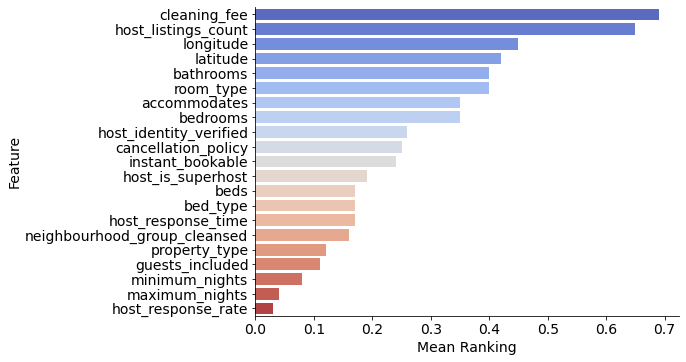

In [32]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=5, aspect=1.9, palette='coolwarm')

In [33]:
trainDf.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time', 'host_listings_count', 'host_identity_verified', 'accommodates', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable', 'cancellation_policy', 'price'], dtype='object')

In [34]:
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
meanplot

,Feature,Mean Ranking
16,cleaning_fee,0.69
3,host_listings_count,0.65
10,longitude,0.45
9,latitude,0.42
12,bathrooms,0.40
8,room_type,0.40
5,accommodates,0.35
13,bedrooms,0.35
4,host_identity_verified,0.26
20,cancellation_policy,0.25


In [35]:
columnName = meanplot.loc[meanplot['Mean Ranking']  >= 0.20]
columnName = list(columnName.Feature)
columnName

['cleaning_fee',
 'host_listings_count',
 'longitude',
 'latitude',
 'bathrooms',
 'room_type',
 'accommodates',
 'bedrooms',
 'host_identity_verified',
 'cancellation_policy',
 'instant_bookable']

# Model building

In [36]:
# Extract the input variable and target variable
X = trainDf[columnName]
y = trainDf[['price']]

testDf = testDf[columnName]


In [37]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Utility functions

In [81]:
model_name = []
r2_score = []
mse = []
rmse = []

def regression_report(ModelName, model_object):
    model_object.fit(X_train, y_train)
    y_test_pred = model_object.predict(X_test)
    
    model_name.append(ModelName)
    print("Model Name:", ModelName)
    r2 = round(metrics.r2_score(y_test, y_test_pred), 4)
    r2_score.append(r2)
    print("r2_score:", r2)
    
    MeanSquareError = round(mean_squared_error(y_test, y_test_pred), 4)
    mse.append(MeanSquareError)
    print("Mean Square Error", MeanSquareError)
    
    RootMeanSquareError = round(math.sqrt(mean_squared_error(y_test, y_test_pred)),4)
    rmse.append(RootMeanSquareError)
    print("Root Mean Square Error", RootMeanSquareError)


In [82]:
linears = {
    "Linear Regression": LinearRegression(normalize =True),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regression": SVR(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    }

In [83]:
for key, val in linears.items():
    regression_report(key,val)
    print('\n')

Model Name: Linear Regression
r2_score: 0.5697
Mean Square Error 7943.501
Root Mean Square Error 89.1263


Model Name: Decision Tree Regressor
r2_score: 0.5194
Mean Square Error 8872.7075
Root Mean Square Error 94.1951


Model Name: Support Vector Regression
r2_score: 0.1999
Mean Square Error 14770.8132
Root Mean Square Error 121.5352


Model Name: Ridge
r2_score: 0.5698
Mean Square Error 7942.1139
Root Mean Square Error 89.1185


Model Name: Lasso
r2_score: 0.5701
Mean Square Error 7936.5087
Root Mean Square Error 89.0871


Model Name: Elastic Net
r2_score: 0.5611
Mean Square Error 8103.3718
Root Mean Square Error 90.0187


Model Name: K-Neighbors Regressor
r2_score: 0.736
Mean Square Error 4873.0899
Root Mean Square Error 69.8075


Model Name: Extra Trees Regressor
r2_score: 0.7857
Mean Square Error 3956.9941
Root Mean Square Error 62.9046




In [84]:
# Random Forest Regressor
trees = [11,21,31]

for tree in trees:
#     print(tree)
    rf = RandomForestRegressor(n_estimators = tree)
    regression_report("Random Forest Regressor #tree: "+ str(tree), rf)
    print('\n')

Model Name: Random Forest Regressor #tree: 11
r2_score: 0.7849
Mean Square Error 3971.3474
Root Mean Square Error 63.0186


Model Name: Random Forest Regressor #tree: 21
r2_score: 0.7818
Mean Square Error 4028.6689
Root Mean Square Error 63.4718


Model Name: Random Forest Regressor #tree: 31
r2_score: 0.7879
Mean Square Error 3914.6607
Root Mean Square Error 62.5672




In [85]:
evaluation_poly = pd.DataFrame({'Model Name' : model_name,
                                'R squared' : r2_score,
                                'MSE' : mse,
                                'RMSE' : rmse})
evaluation_poly.sort_values(['R squared'], ascending=False, inplace = True)
evaluation_poly

,Model Name,R squared,MSE,RMSE
10,Random Forest Regressor #tree: 31,0.7879,3914.6607,62.5672
7,Extra Trees Regressor,0.7857,3956.9941,62.9046
8,Random Forest Regressor #tree: 11,0.7849,3971.3474,63.0186
9,Random Forest Regressor #tree: 21,0.7818,4028.6689,63.4718
6,K-Neighbors Regressor,0.7360,4873.0899,69.8075
4,Lasso,0.5701,7936.5087,89.0871
3,Ridge,0.5698,7942.1139,89.1185
0,Linear Regression,0.5697,7943.5010,89.1263
5,Elastic Net,0.5611,8103.3718,90.0187
1,Decision Tree Regressor,0.5194,8872.7075,94.1951


# Model selection

Random forest model performs (R2 Score) well compared to other models such as linear regression, decision tree and support vector regressor. Random forest model has selected for further prediction and analytics.


In [ ]:
rf = ExtraTreesRegressor()
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
    
r2 = round(metrics.r2_score(y_test, y_test_pred), 4)
r2_score.append(r2)
print("r2_score:", r2)
    
MeanSquareError = round(mean_squared_error(y_test, y_test_pred), 4)
print("Mean Square Error", MeanSquareError)
    
RootMeanSquareError = round(math.sqrt(mean_squared_error(y_test, y_test_pred)),4)
rmse.append(RootMeanSquareError)
print("Root Mean Square Error", RootMeanSquareError)


In [ ]:
@@

In [ ]:
result = pd.DataFrame(y_test_pred)
result.rename({'0':'Prediction'}, axis=1, inplace=True)

In [ ]:
result.to_csv('Prediction.csv')

In [ ]:
result

# Conclution: 

The results as per the Accuracy for Decision Tree, Random Forest and K-Nearest Neighbor Regressor  are 92.44%, 92.25% and 88.45%.

The comparative results show that Decision Tree and Random Forest Regressor perform better than K-Nearest Neighbor.
